In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from datetime import date
!pip3 install yfinance
import yfinance as yf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf

In [4]:
stockdata = dict()
indian_stocks = ['ITC.NS','LT.NS','SUNPHARMA.NS','BPCL.NS','ASIANPAINT.NS','RELIANCE.NS','HDFC.NS']  # We are retriving last 10 yrs quaterly stock data.
for i in indian_stocks:
  data = yf.download(i, period='10y',interval='1d', dropna='True')
  data['Ticker'] = str(i)
  stockdata[i] = data
  print(data.info())

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2012-04-30 to 2022-04-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2464 non-null   float64
 1   High       2464 non-null   float64
 2   Low        2464 non-null   float64
 3   Close      2464 non-null   float64
 4   Adj Close  2464 non-null   float64
 5   Volume     2464 non-null   int64  
 6   Ticker     2464 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 154.0+ KB
None
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2012-04-30 to 2022-04-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2464 non-null   float64
 1   High       2464 non-null   float64
 2   Low        2464 non-

In [5]:
stock_prices = pd.DataFrame() # We are using 'close' price of the particular stock.
for i in stockdata.keys():
  stock_prices[i] = stockdata[i]['Close']

In [6]:
stock_prices.dropna(inplace=True)
stock_prices.tail(10)

,ITC.NS,LT.NS,SUNPHARMA.NS,BPCL.NS,ASIANPAINT.NS,RELIANCE.NS,HDFC.NS
Date,,,,,,,
2022-04-13,269.549988,1760.800049,936.750000,379.000000,3080.649902,2551.649902,2378.500000
2022-04-18,270.100006,1738.349976,927.500000,371.750000,3021.550049,2543.850098,2263.500000
2022-04-19,261.549988,1705.750000,922.000000,375.850006,2991.199951,2640.800049,2140.199951
2022-04-20,259.549988,1691.599976,923.500000,389.950012,3083.000000,2718.449951,2180.199951
2022-04-21,260.399994,1714.500000,944.099976,397.700012,3158.250000,2782.100098,2230.649902
2022-04-22,261.100006,1694.349976,924.799988,393.399994,3164.399902,2758.800049,2206.399902
2022-04-25,255.250000,1657.349976,900.000000,369.700012,3130.600098,2695.000000,2210.500000
2022-04-26,258.950012,1699.949951,918.049988,372.850006,3125.649902,2775.649902,2230.199951
2022-04-27,257.500000,1677.050049,906.099976,366.500000,3148.350098,2778.350098,2218.699951


Text(0, 0.5, 'price in $')

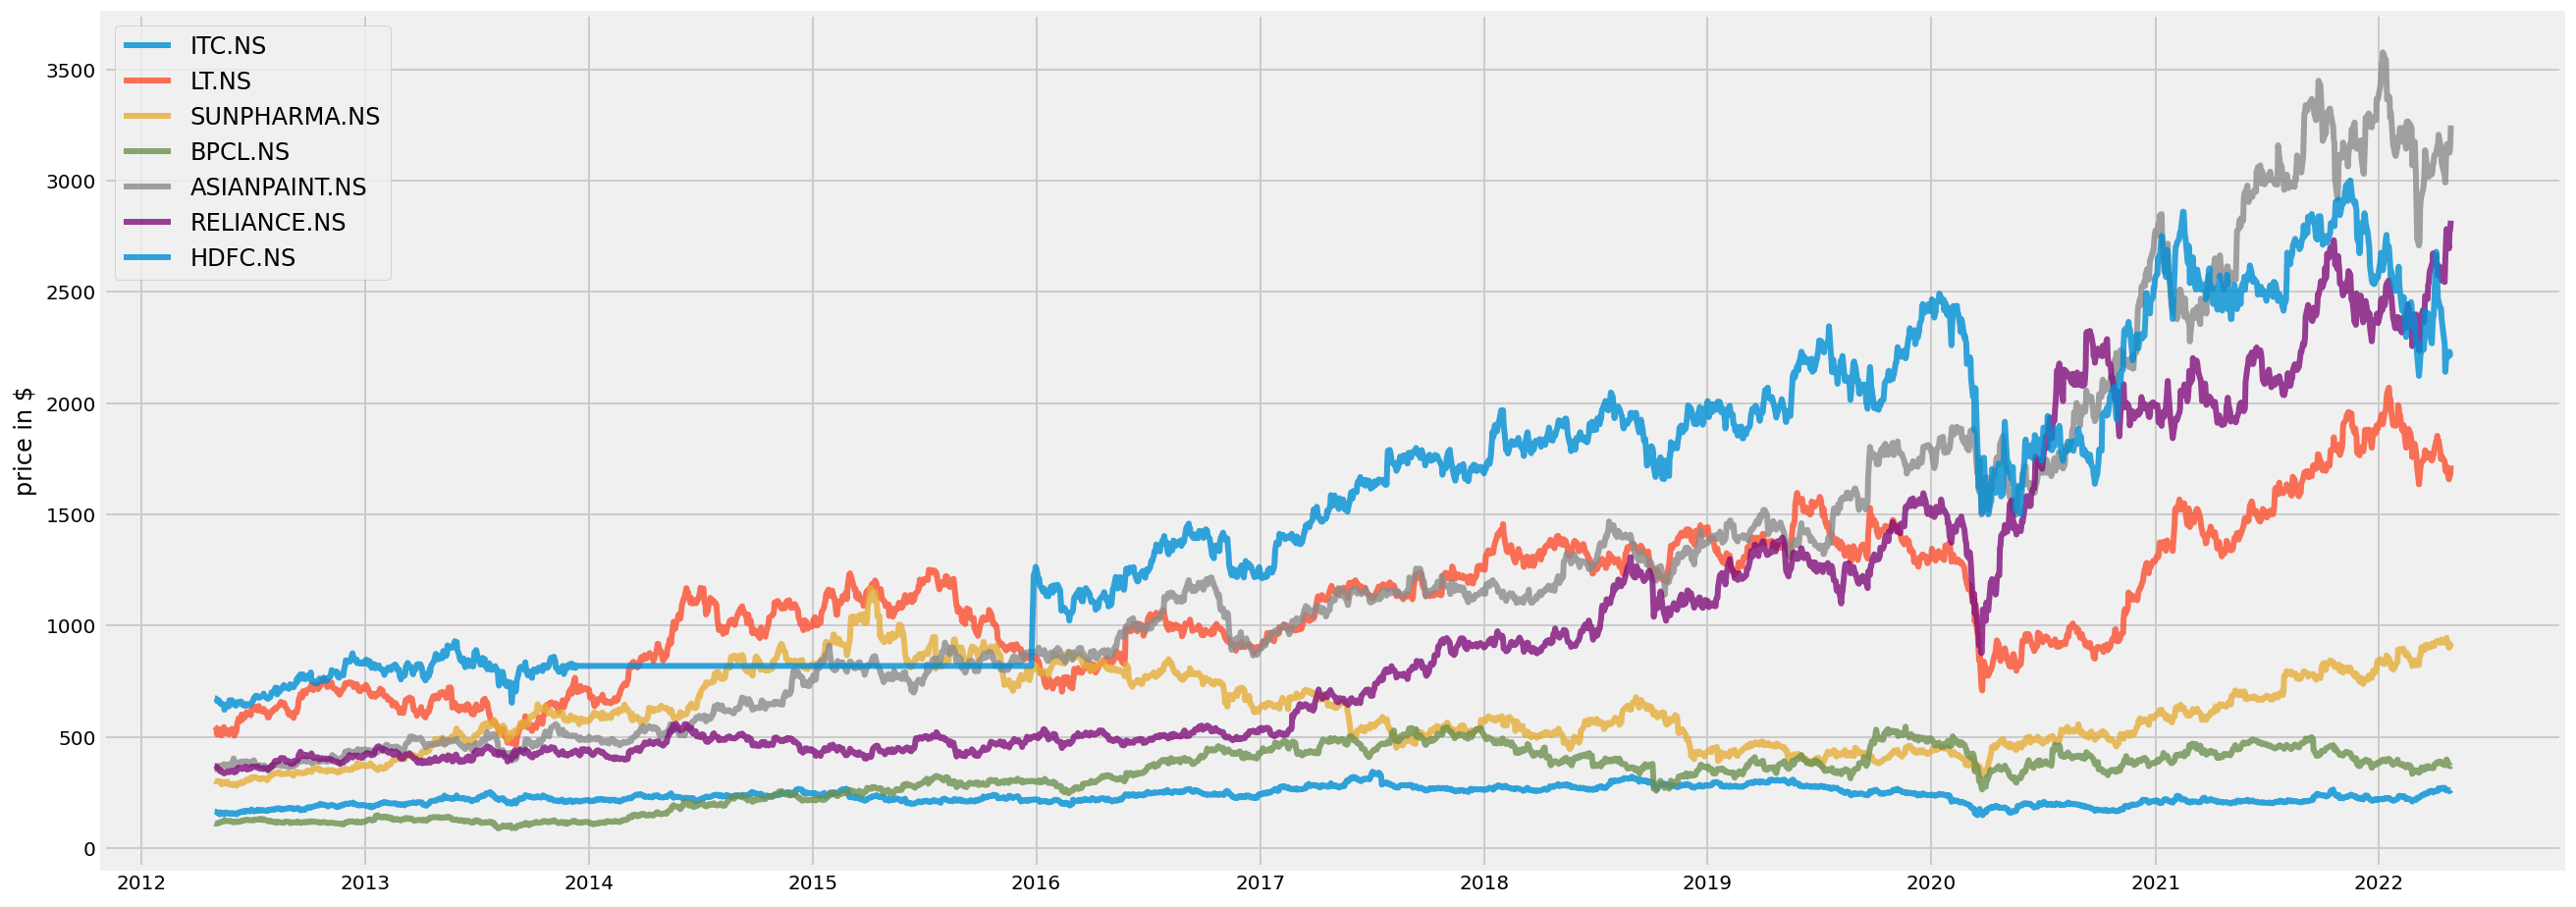

In [7]:
plt.figure(figsize=(20, 8))
for c in stock_prices.columns.values:
    plt.plot(stock_prices.index, stock_prices[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')
# Overall their is an Upward Trend in most of the stocks in quaterely basis. With AsianPaint being the highest
# As it is 10yr data we must also consider factors such as GDP,Inflation etc

Text(0, 0.5, 'daily returns')

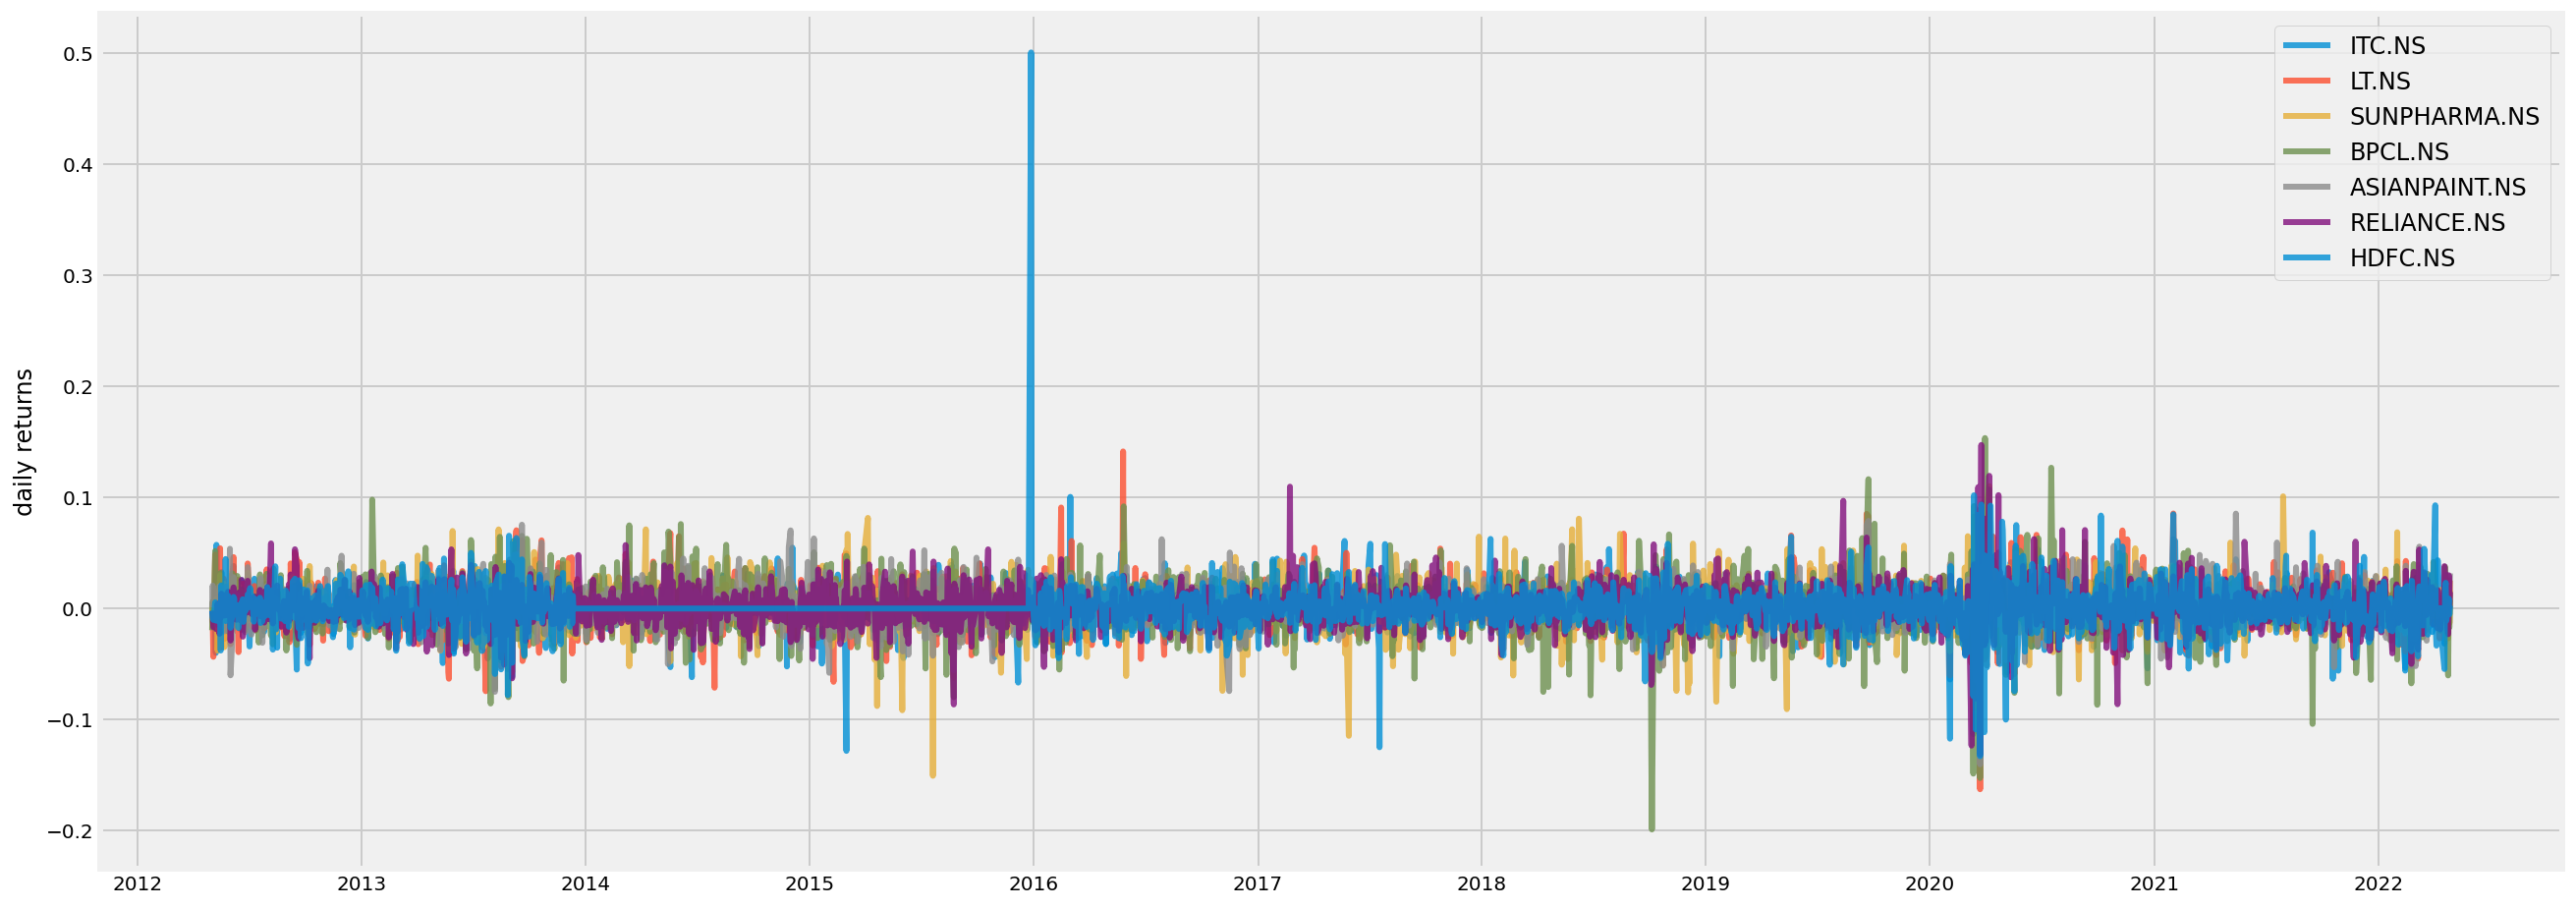

In [8]:
# In order to understand all stock more clearly, we can plot daily returns plot. 
returns = stock_prices.pct_change()  # Gives the Daily returns dataframe after each quater in last 10yrs
plt.figure(figsize=(20, 8))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

# This plot gives the volatility of returns in each stock.

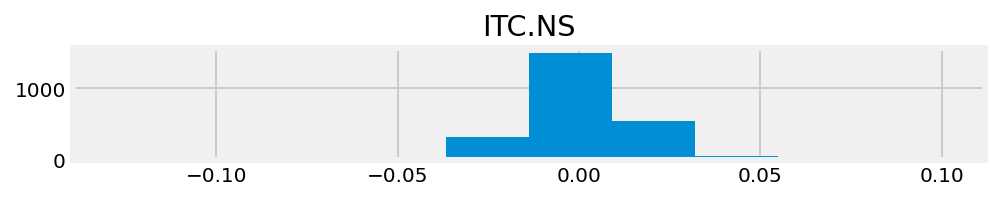

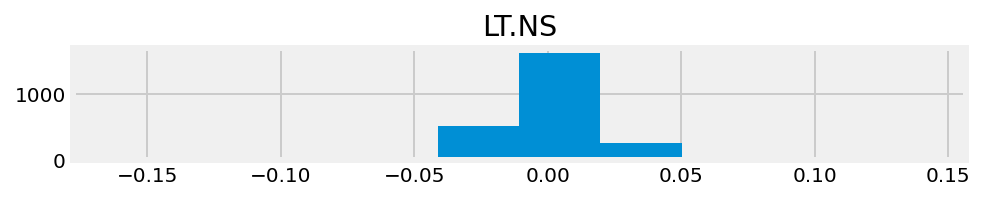

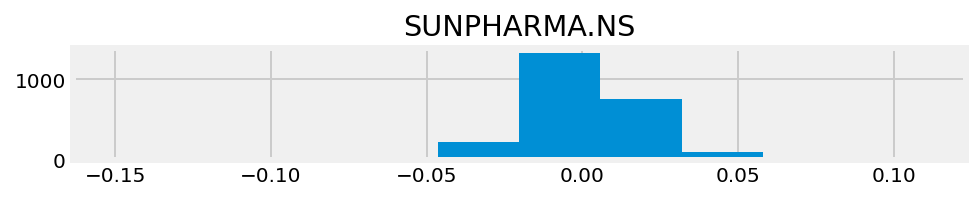

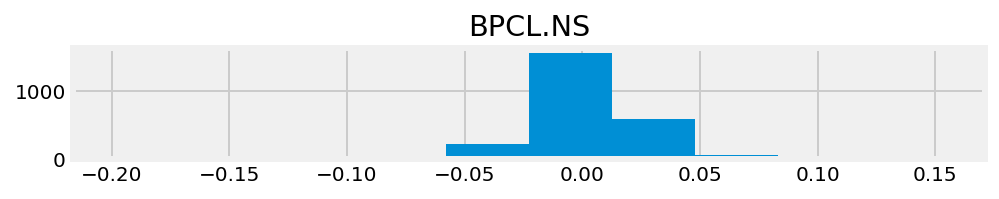

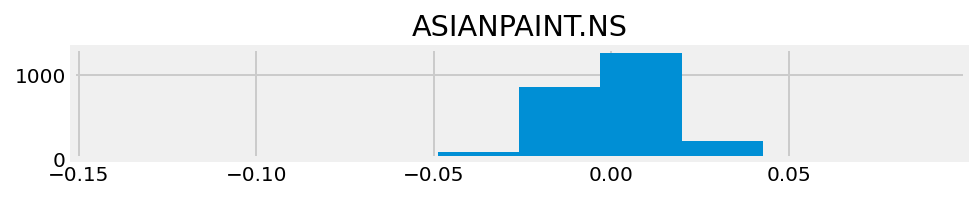

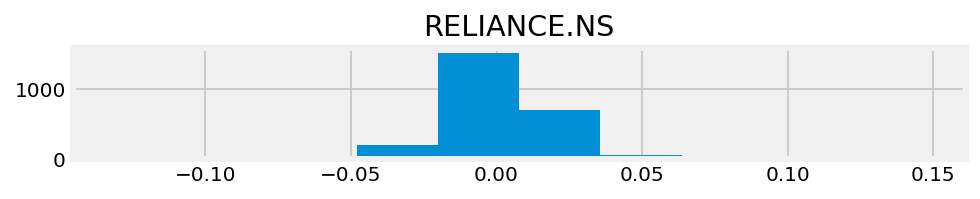

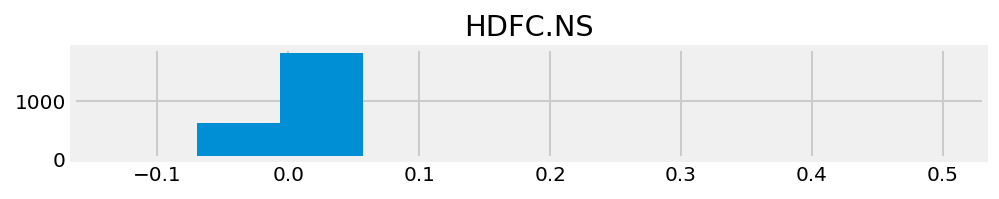

In [9]:
# Distribution of stocks
k=1
for i in range(0, len(returns.columns)):
 plt.figure(figsize=(20,8))
 plt.subplot(7, 3, k)
 plt.hist(returns[returns.columns[i]])
 plt.title('{}'.format(returns.columns[i]))
 k+=1
 plt.tight_layout()
 plt.show()

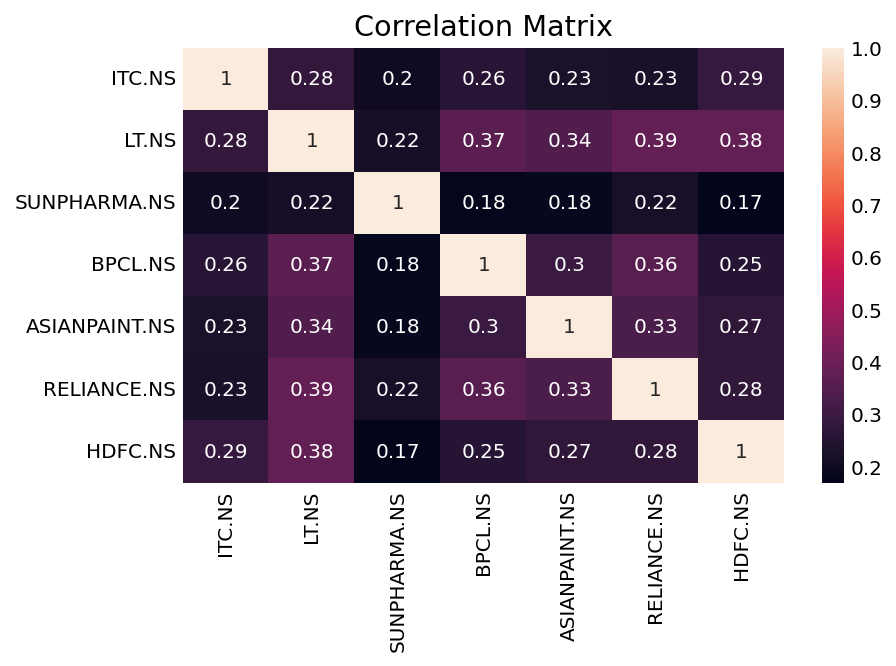

In [10]:
# Lets compute correlation analysis Using Heatmap for Quaterly returns
heat_corr=returns.corr()
sns.heatmap(heat_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()
# their is no reasonable correlation between quaterly returns in data. 

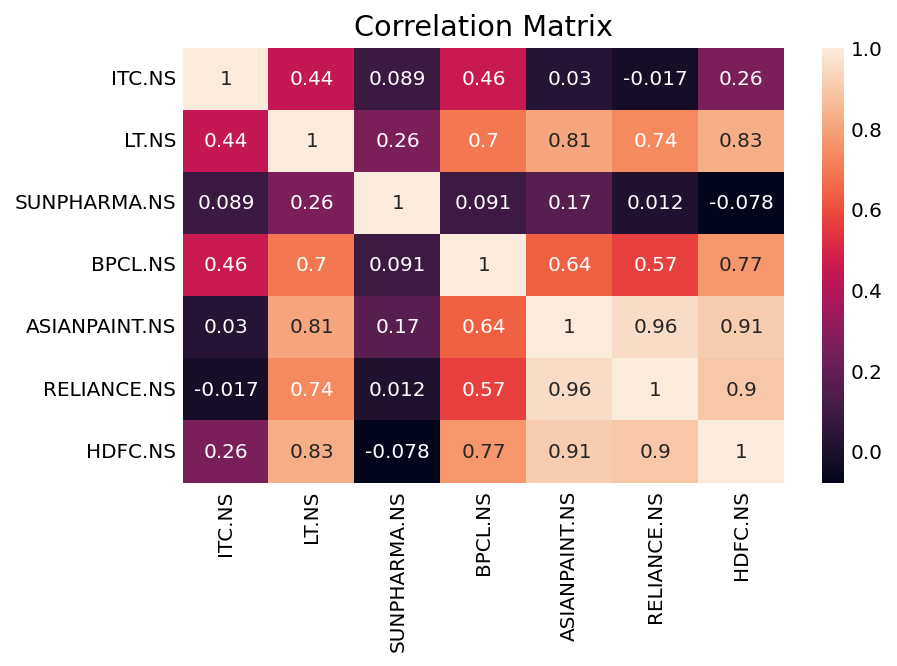

In [17]:
# Lets compute correlation analysis for Stock Prices.
heat_corr=stock_prices.corr()
sns.heatmap(heat_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()
# Their is good reasonable correlation between stock prices especially between (AsianPaints,HDFC),(Reliance,HDFC),(Reliance,Asian),(L&T,AsianPaints),(BPCL,HDFC),(L&T,HDFC).
# We measure the correlation in order to reduce the risk or volatility.

# Random Portfolio Generation and Efficient Frontier

In [11]:
# Lets consider these seven stocks and apply our distribute weights for these four stocks. Sum(weights(i)) = 1.
# Lets initialize random weights to each stock in portfolio and we can calculate the portfolio returns and annualized volatility.
# We consider 252 trading days in a year.
# portfolio_annualised_performance returns annualized standard deviation and annualized returns.
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
# random_portfolios takes in no.of portfolio's, mean_returns, covariance matrix and risk_free_return(if we invest the same money in govt bond)
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((5,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(7)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev # Sharpe ratio of a stock. Risk Adjusted Return
    return results, weights_record

In [12]:
# In Above code, portfolio_standard_deviation describes the volatility of the stock., we multiply the portfolio_standard_deviation with 
# square_root(no. of trading days) to get the annualized_portfolio_return.
# Sharpe Ratio: Risk-adjusted return refines an investment’s return by measuring how much risk is involved in producing that return, 
# which is generally expressed as a number or rating. 
# Although sharpe ratio assume the return to be from normal distribution.


In [13]:
returns = stock_prices.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 80000 # We are generating 80000 random portfolio's
risk_free_rate = 0.0178 # 1.78% according to Indian Bank.

In [14]:
# This function generated random portfolio initialization, gets the results (portfolio returns, portfolio volatility, 
# portfolio Sharpe ratio) and weights for the corresponding result. Then by locating the one with the highest Sharpe ratio portfolio,
# it displays maximum Sharpe ratio portfolio as red star sign. Does similar steps for minimum volatility portfolio, 
# and displays it as a green star on the plot.
# All the randomly generated portfolios will be also plotted with colour map applied to them based on the Sharpe ratio. 
# Bluer, higher the Sharpe ratio.

def display_simulated_ef_with_random(prices,mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=prices.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=prices.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(20, 8))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    return max_sharpe_allocation,min_vol_allocation



--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.24
Annualised Volatility: 0.2


            ITC.NS  LT.NS  SUNPHARMA.NS  BPCL.NS  ASIANPAINT.NS  RELIANCE.NS  \
allocation    0.37   3.07         12.07     1.64          44.72        33.39   

            HDFC.NS  
allocation     4.75  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.18
Annualised Volatility: 0.18


            ITC.NS  LT.NS  SUNPHARMA.NS  BPCL.NS  ASIANPAINT.NS  RELIANCE.NS  \
allocation   23.36   9.97         18.39     1.95           20.5        13.81   

            HDFC.NS  
allocation    12.02  


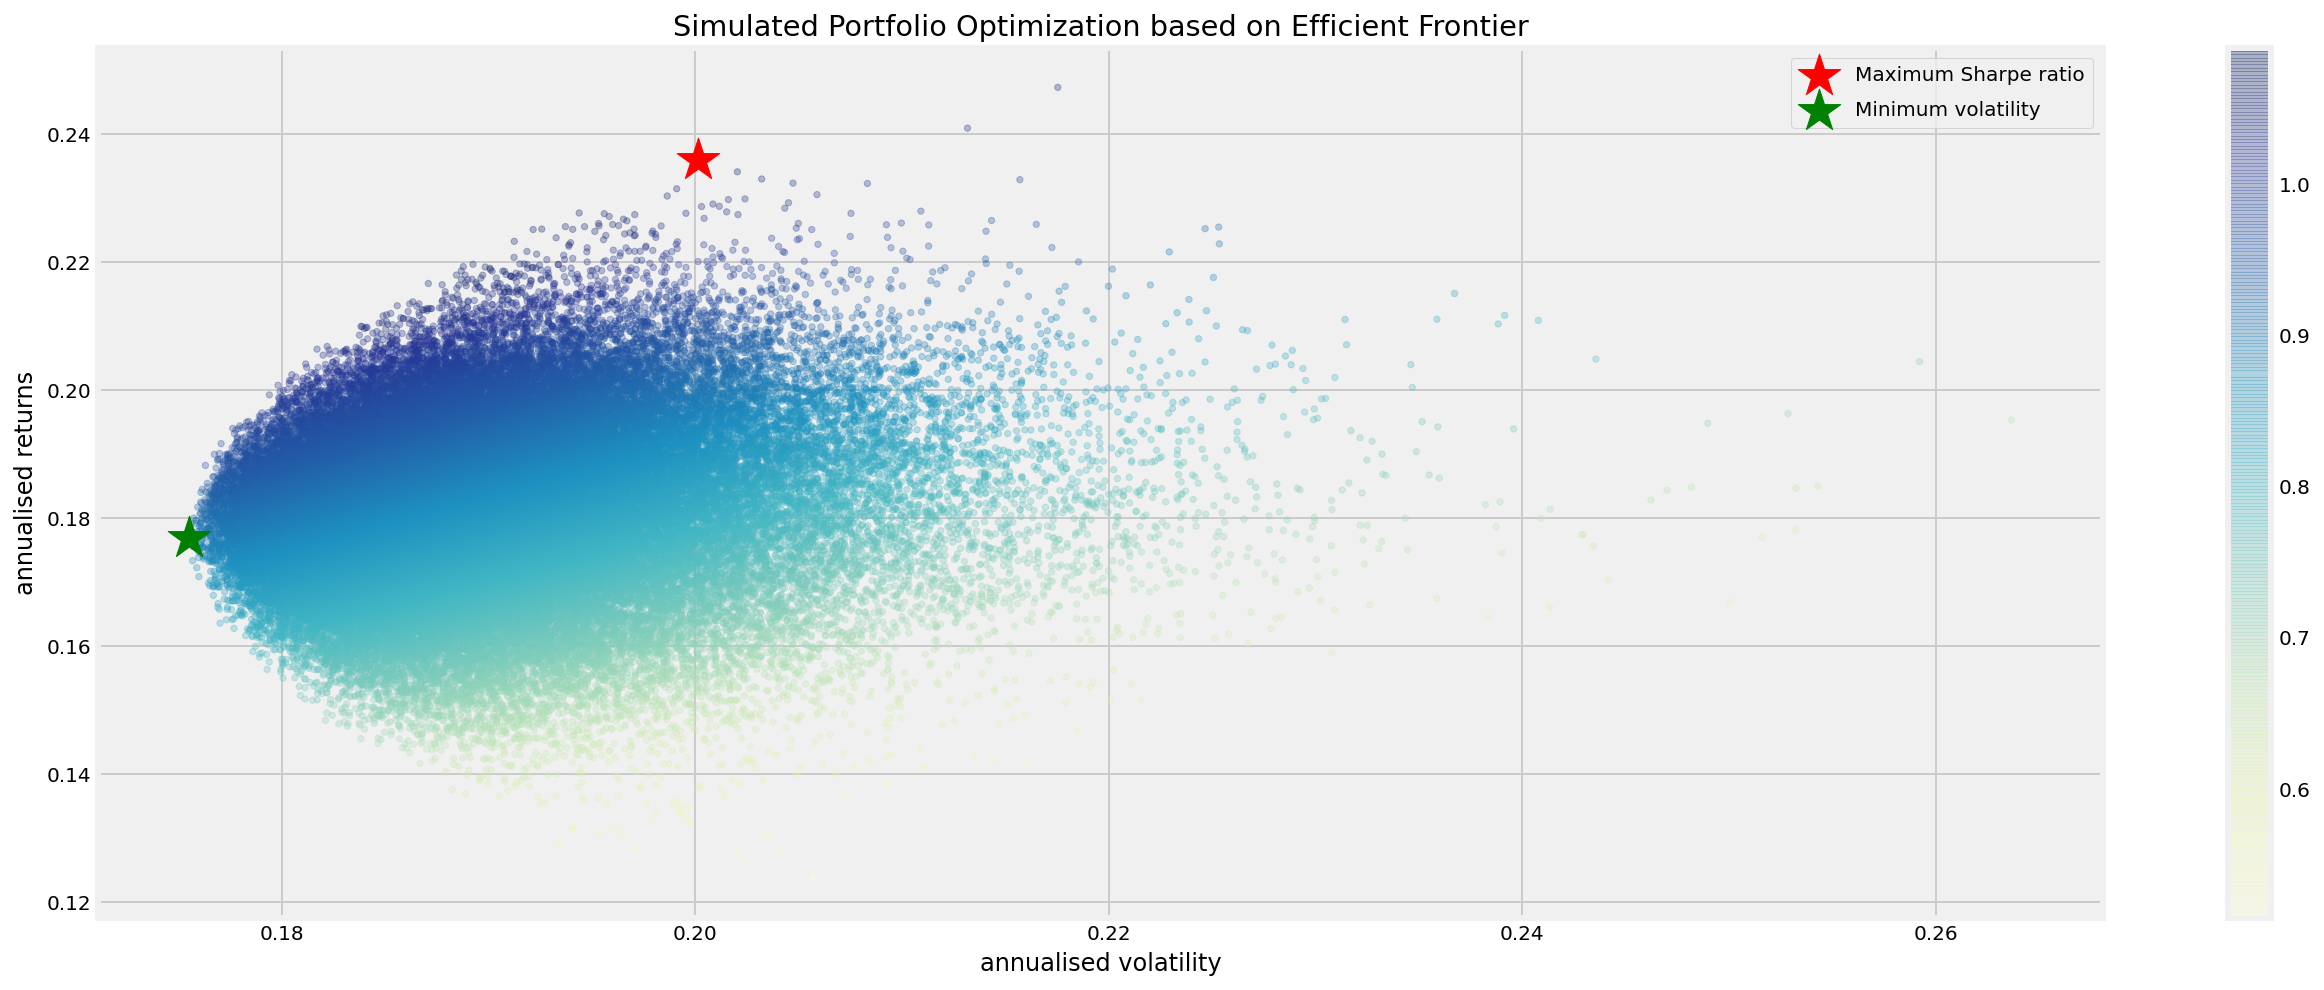

In [15]:
max_allocation, min_allocation = display_simulated_ef_with_random(stock_prices,mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [16]:
print(max_allocation.T)
# Such an Allocation gives maximum return and quite some risk.
print(min_allocation.T)
# We can see incase of minimum allocation, the risk is minimised but return is also comprimised in a way, 
# Such an allocation can guarantee only minimal return and Allocation is counter opposite to max_allocation

               allocation
ITC.NS               0.37
LT.NS                3.07
SUNPHARMA.NS        12.07
BPCL.NS              1.64
ASIANPAINT.NS       44.72
RELIANCE.NS         33.39
HDFC.NS              4.75
               allocation
ITC.NS              23.36
LT.NS                9.97
SUNPHARMA.NS        18.39
BPCL.NS              1.95
ASIANPAINT.NS       20.50
RELIANCE.NS         13.81
HDFC.NS             12.02


# Calculating returns for the above portfolio


In [17]:
allocation = (max_allocation + min_allocation)/2

In [18]:
print(allocation)

            ITC.NS  LT.NS  SUNPHARMA.NS  BPCL.NS  ASIANPAINT.NS  RELIANCE.NS  \
allocation  11.865   6.52         15.23    1.795          32.61         23.6   

            HDFC.NS  
allocation    8.385  


In [20]:
alloc = dict()
alloc['ITC.NS'] = 11.865
alloc['LT.NS'] = 6.52
alloc['SUNPHARMA.NS'] = 15.23
alloc['BPCL.NS'] = 1.795
alloc['ASIANPAINT.NS'] = 32.61
alloc['RELIANCE.NS'] = 23.6
alloc['HDFC.NS'] = 8.385
print(alloc)


{'ITC.NS': 11.865, 'LT.NS': 6.52, 'SUNPHARMA.NS': 15.23, 'BPCL.NS': 1.795, 'ASIANPAINT.NS': 32.61, 'RELIANCE.NS': 23.6, 'HDFC.NS': 8.385}


In [21]:
for i in allocation:
  print(stockdata[i].head())
  stockdata[i].reset_index(drop=True,inplace=True)
  print(stockdata[i].head())
  stockdata[i].drop(['Ticker'],inplace=True,axis=1)
  print(stockdata[i].head())
  print(allocation[i])
  stockdata[i] = stockdata[i]*alloc[i]/100
  print(stockdata[i])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-04-30  165.333328  166.199997  163.399994  163.666672  126.952225   
2012-05-02  163.699997  165.233337  162.333328  163.066666  126.486816   
2012-05-03  163.600006  163.966660  160.666672  161.133331  124.987175   
2012-05-04  160.933334  163.300003  158.233337  158.766663  123.151421   
2012-05-07  156.666672  159.333328  155.566666  157.566666  122.220612   

             Volume  Ticker  
Date                         
2012-04-30  4779780  ITC.NS  
2012-05-02  7175770  ITC.NS  
2012-05-03  5652130  ITC.NS  
2012-05-04  9590292  ITC.NS  
2012-05-07  7580217  ITC.NS  
         Open        High         Low       Close   Adj Close   Volume  Ticker
0  165.333328  166.199997  163.399994  163.666672  126.952225  4779780  ITC.NS
1  163.699997  165.233337  162.333328  163.066666  126.486816  7175770  ITC.NS
2  163.600006  163.966660  160.666

In [22]:
data = stockdata['HDFC.NS'] + stockdata['LT.NS'] + stockdata['ASIANPAINT.NS'] + stockdata['BPCL.NS'] + stockdata['ITC.NS'] + stockdata['RELIANCE.NS'] + stockdata['SUNPHARMA.NS']

In [23]:
data.index = stock_prices.index

In [24]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-04-30,360.002892,364.332103,358.303880,361.489380,325.020357,2.733573e+06
2012-05-02,361.783845,364.197145,357.828436,360.357480,324.024487,2.901067e+06
2012-05-03,358.621020,364.227924,355.537682,361.296900,324.990250,2.466449e+06
2012-05-04,360.083816,363.996601,355.264196,357.969835,322.118757,4.337453e+06
2012-05-07,353.991142,363.753144,350.250508,359.464948,323.350158,4.494113e+06


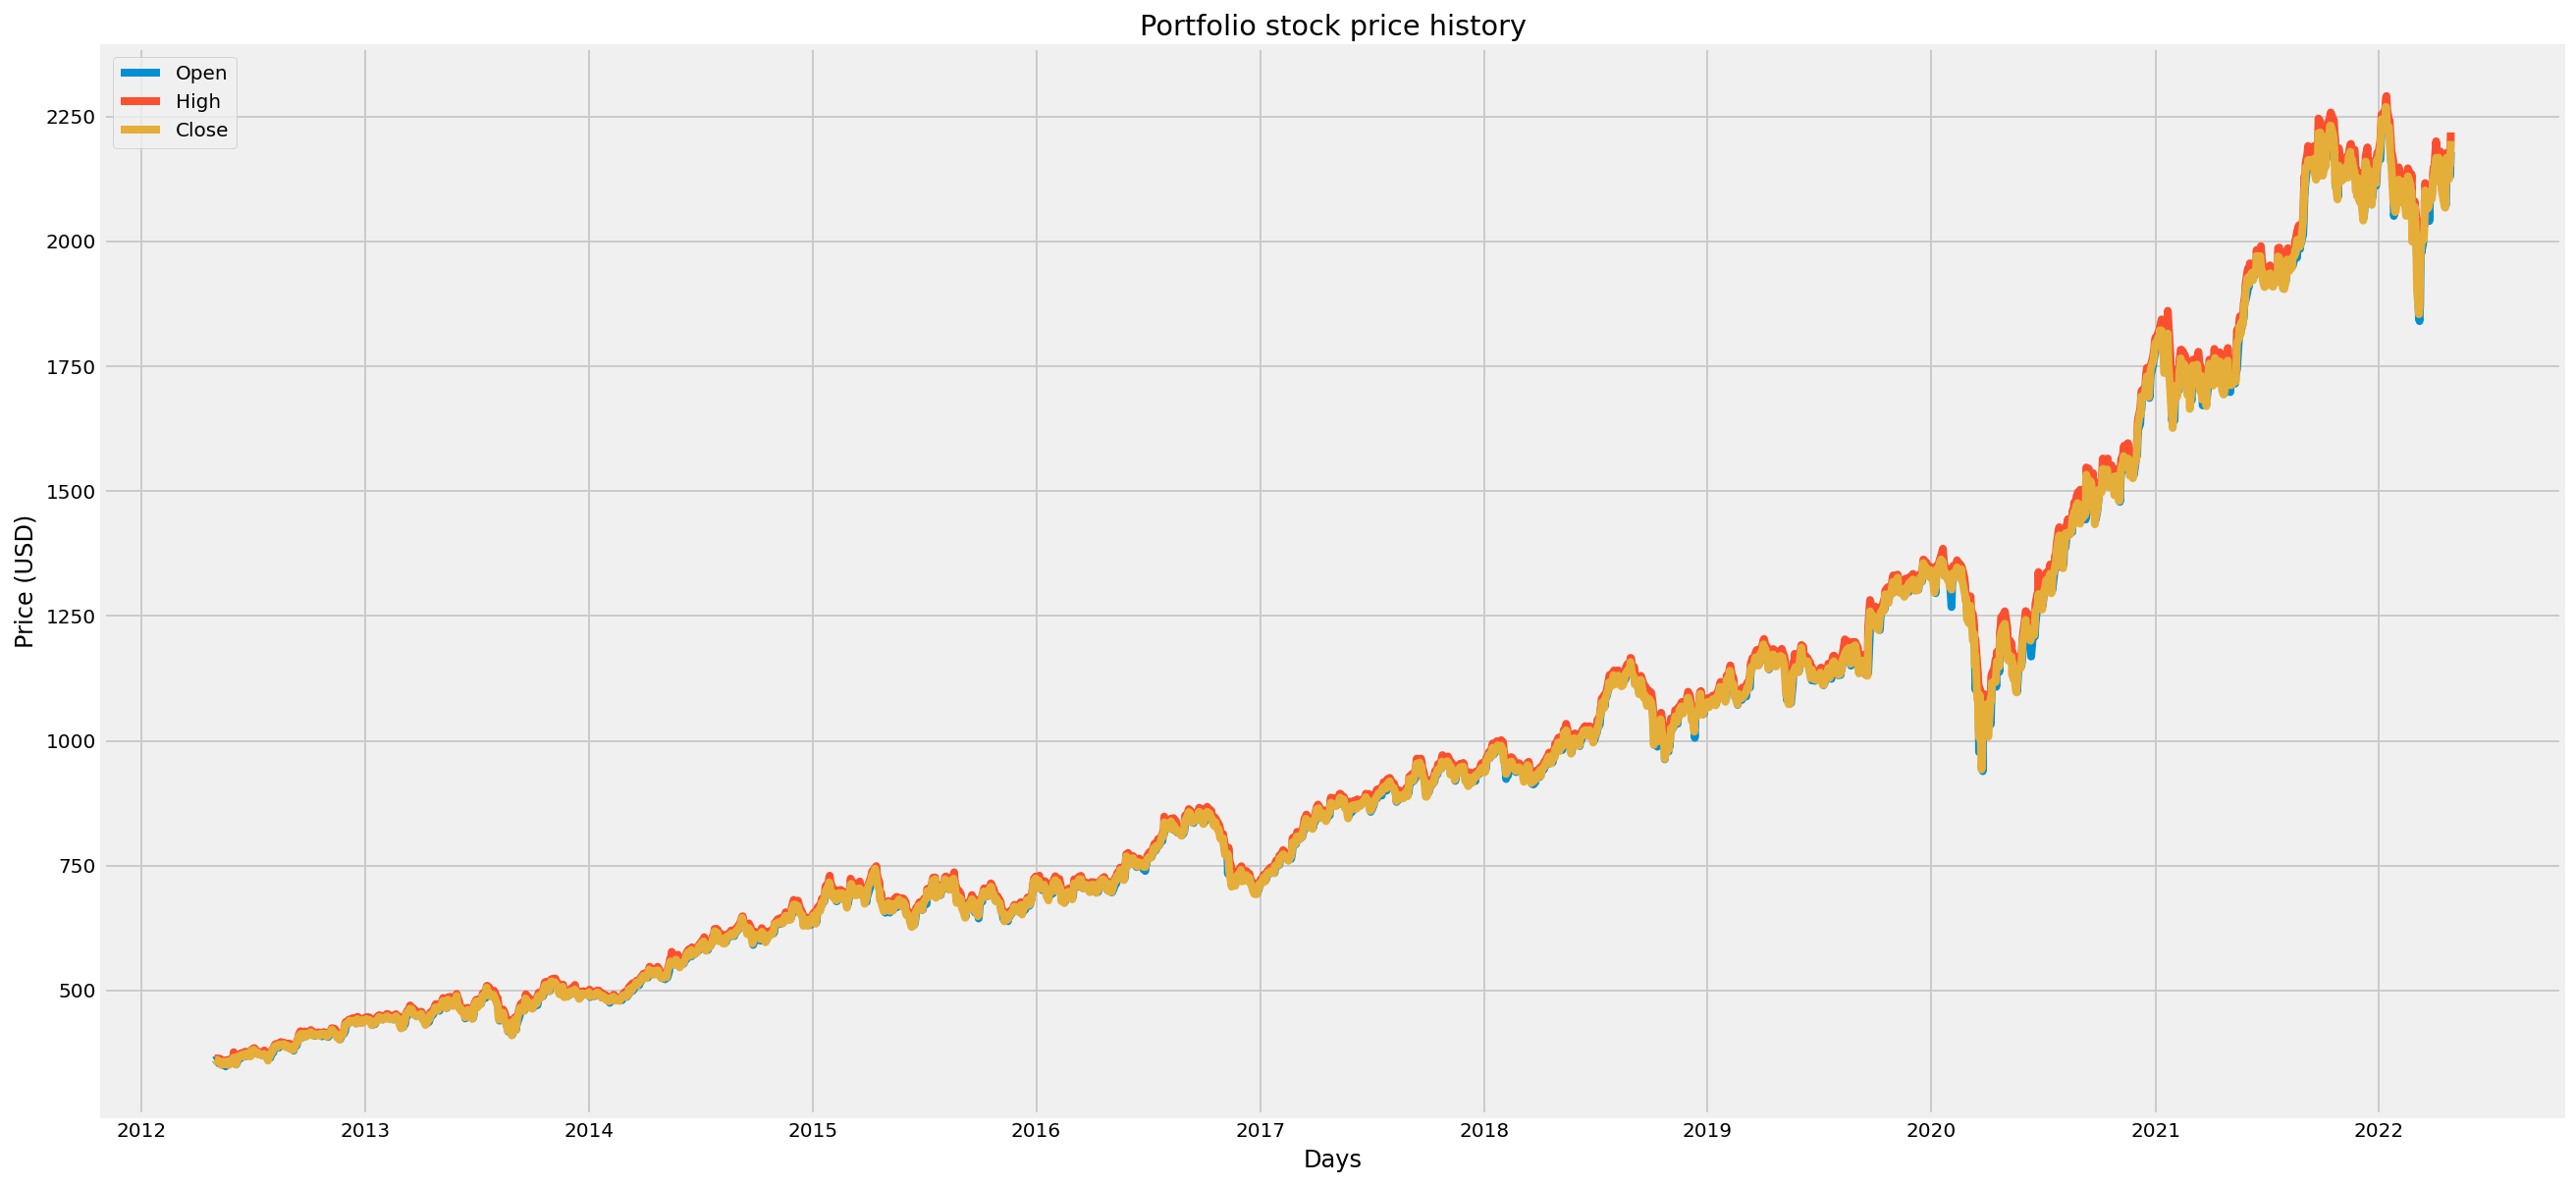

In [25]:
plt.figure(figsize=(20,10))
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Close"])
plt.title('Portfolio stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Close'], loc='upper left')
plt.show()

## Linear Regression

In [26]:
class Raptorsforecast():
  '''
 'Enter Model (LR|KNN|DT|SVR|RF)'
  '''
  models = dict()
  dataset = pd.DataFrame()
  train_split = 0.70
  test_split = 0.30
  
  def __init__(self,data):
    self.dataset = data
    self.models['LR'] = LinearRegression()
    self.models['KNN'] = KNeighborsRegressor()
    self.models['DT'] = DecisionTreeRegressor()
    self.models['SVR'] = SVR()
    self.models['RF'] = RandomForestRegressor()
  
  


  def mean_absolute_percentage_error(self ,y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    
  def iterateResults(self,model_type):
    outputs_iter = dict()
    actual_iter = dict()
    days = [100,200,300,400,500,600,700]
    if model_type=='linear_regression':
      for i in days:
        print('Results of Linear Regression forecasting next '+str(i)+' trading days.')
        self.machineLearinigModels(i,'LR')
        print('#'*20)
        print('-'*20)
        print('#'*20)

  
  def create_dataset(self, data,forecast_out):
    dataX, dataY = [], []
    
    for i in range(len(data)-forecast_out):
        
        a = data[i:(i+forecast_out), 0]        
        dataX.append(a)
        dataY.append(data[i + forecast_out, 0])
    
    return np.array(dataX), np.array(dataY)
  
  def normalizeData(self,data):
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled = np.array(scaler.fit_transform(data)).reshape(-1,1)
    return scaled

  def minmaxscaler(self):
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled = scaler.fit_transform(self.dataset)
    train_size = int(len(scaled) * self.train_split)
    test_size = len(scaled - train_size)
    train, test = scaled[0:train_size, :], scaled[train_size:len(scaled), :]
    return train,test

  def machineLearinigModels(self,forecast_out,modelname):
    '''
    This method takes two input parameters (dataset,forecast_out)
    It prints all the metrics for forecasted and fitted values in the dataset of regression model with Optimal Parameters
    Also returns the np.array for next forecasted values.
    '''
    train,test = self.minmaxscaler()
    X_train, y_train = self.create_dataset(train, forecast_out)
    X_test, y_test = self.create_dataset(test, forecast_out)
    #X,y = self.createDataset(forecast_out)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # Create and train the Linear Regression  Model
    # Train the model
    print('Prediction Using ',modelname)
    dict_metrics = {}
    model = self.models[modelname]
    model = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    mse_test  = metrics.mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    dict_metrics = {
        'Values Forecasted' : forecast_out,
        'Model Name' : modelname,
        'Train RMSE' : rmse_train,
        'Train R2 Score' : metrics.r2_score(y_train, y_pred_train),
        'Test RMSE' : rmse_test,
        'Test R2 Score' : metrics.r2_score(y_test, y_pred_test)
                      }
    for k,d in dict_metrics.items():
      print(str(k)+ ' : '+str(d))
  


  

In [27]:
forecast = Raptorsforecast(data)

In [28]:
forecast.iterateResults('linear_regression')

Results of Linear Regression forecasting next 100 trading days.
Prediction Using  LR
Values Forecasted : 100
Model Name : LR
Train RMSE : 0.004028926475588592
Train R2 Score : 0.9986488652707132
Test RMSE : 0.012891761892942036
Test R2 Score : 0.9950817192446564
####################
--------------------
####################
Results of Linear Regression forecasting next 200 trading days.
Prediction Using  LR
Values Forecasted : 200
Model Name : LR
Train RMSE : 0.0039998582634007546
Train R2 Score : 0.9985485102398517
Test RMSE : 0.013947779279472348
Test R2 Score : 0.9940060901566224
####################
--------------------
####################
Results of Linear Regression forecasting next 300 trading days.
Prediction Using  LR
Values Forecasted : 300
Model Name : LR
Train RMSE : 0.003934238781668844
Train R2 Score : 0.9984535354184741
Test RMSE : 0.01382363864763023
Test R2 Score : 0.9889285708327578
####################
--------------------
####################
Results of Linear Regr

## LSTM

In [29]:
def scale_and_split_dataset(scaled):

  #70% examples will used for training (in the begining)
  train_size = int(len(scaled) * 0.70)

  #30% will be used for Test
  test_size = len(scaled) - train_size

  #print('train_size = {}, test_size = {}'.format(train_size, test_size))
  #Split the data
  train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
  #print('train: {}\ntest: {}'.format(len(train), len(test)))
  print("Train data shape is",train.shape)
  print("Test data shape is",test.shape)

  return train, test

In [30]:
#window - how long the sequence will be
def create_dataset(dataset, window=1):    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):       
        a = dataset[i:(i+window), 0]        
        dataX.append(a)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)

In [31]:
def savepic(name):
  print("Do you wanna download the output picture")
  if input() == 'Yes':
    plt.savefig(name+".png")
    files.download(name+".png") 
  else:
    print("Thanks for typing")

In [32]:
def make_3dim(X_train, X_test):
  #make it 3 Dimensional Data - needed for LSTM
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  print("Shape of X_train and X_test after reshaping into (length of input, no of time steps, no of features)")
  print(X_train.shape)
  print(X_test.shape)

  return X_train, X_test

In [33]:
def build_and_compile_model(units=256, dropout=0.15, window_size=1):
  
  model = Sequential()
  model.add(LSTM(units=256,return_sequences=True,input_shape=(X_train.shape[1], 1)))
  model.add(Dropout(0.1))
  model.add(LSTM(units=256,return_sequences=True))
  model.add(Dropout(0.1))
  model.add(LSTM(units=256,return_sequences=True))
  model.add(Dropout(0.1))
  model.add(LSTM(units=256))
  model.add(Dropout(0.1))
  model.add(Dense(units=5))
  model.add(Dense(units=1))
  model.compile(optimizer='adam',loss='mean_squared_error')

  return model

In [34]:
# Add model checkpoint to save the best model weights.The best model is one with least validation loss
def call_back(window_size):
  if window_size == 60:
    LSTMcheckpoint_path = "/content/drive/My Drive/Capstone/Saved_Models/lstm_full_dataset_60days.ckpt"
  elif window_size == 120:
    LSTMcheckpoint_path = "/content/drive/My Drive/Capstone/Saved_Models/lstm_full_dataset_120days.ckpt"
  elif window_size == 180:
    LSTMcheckpoint_path = "/content/drive/My Drive/Capstone/Saved_Models/lstm_full_dataset_180days.ckpt"
  else:
    LSTMcheckpoint_path = "/content/drive/My Drive/Capstone/Saved_Models/lstm_full_dataset_600days.ckpt"
  
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=LSTMcheckpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode = 'min',
                                                 save_best_only=True,
                                                 verbose=1)

  return LSTMcheckpoint_path, cp_callback

In [35]:
def make_predictions(model, X_train, X_test):
  return model.predict(X_train), model.predict(X_test)

In [36]:
def find_metrics(trainPredict, testPredict, y_train, y_test, window_size):
  
  train_mse = mean_squared_error(y_train, trainPredict)
  train_rmse = np.sqrt(train_mse)
  train_mae = mean_absolute_error(y_train, trainPredict)
  train_r2 = r2_score(y_train, trainPredict)

  test_mse = mean_squared_error(y_test, testPredict)
  test_rmse = np.sqrt(test_mse)
  test_mae = mean_absolute_error(y_test, testPredict)
  test_r2 = r2_score(y_test, testPredict)

  print("Metrics for train and test datasets:\n")
  print("train_mse = ", train_mse)
  print("test_mse = ", test_mse)

  print("\ntrain_rmse = ", train_rmse)
  print("test_rmse = ", test_rmse)

  print("\ntrain_mae = ", train_mae)
  print("test_mae = ", test_mae)

  print("\ntrain_r2 = ", train_r2)
  print("test_r2 = ", test_r2)

  dict_metrics = {
                    'Window Size' : [window_size],
                    'Model Name' : ['LSTM'], 
                    'Train MAE' : [round(train_mae, 4)],
                    'Test MAE' : [round(test_mae, 4)],
                    'Train MSE' : [round(train_mse, 4)],  
                    'Test MSE' : [round(test_mse, 4)],                
                    'Train RMSE' : [round(train_rmse, 4)],
                    'Test RMSE' : [round(test_rmse, 4)],
                    'Train R2 Score' : [round(train_r2, 4)],                    
                    'Test R2 Score' : [round(test_r2, 4)]
                  }
  metrics_df = pd.DataFrame(dict_metrics)
  return metrics_df

In [37]:
def inverse_transform(trainPredict, testPredict, scaler):
  return scaler.inverse_transform(trainPredict), scaler.inverse_transform(testPredict)

In [38]:
def plot_predictions(scaled, scaler, trainPredict_inverse, testPredict_inverse, window_size=1):

  trainPredict = trainPredict_inverse
  testPredict = testPredict_inverse

  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(scaled)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict
  
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(scaled)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict

  # plot baseline, trainPredict and testPredict
  plt.figure(figsize=(10,5))
  labels = ['baseline', 'trainPredict', 'testPredict']

  # #baseline plot
  plt.plot(scaler.inverse_transform(scaled), color='yellow')

  
  #Train Predicted Plot
  plt.plot(trainPredictPlot, color='deepskyblue')

  #Test Predicted Plot
  plt.plot(testPredictPlot, color='darkorange')
  
  plt.legend(labels)
  plt.show()

In [39]:
data.drop(['Open', 'High', 'Low','Volume','Adj Close'], axis = 1, inplace=True)

In [40]:
data.head()

,Close
Date,
2012-04-30,361.489380
2012-05-02,360.357480
2012-05-03,361.296900
2012-05-04,357.969835
2012-05-07,359.464948


In [41]:
#Normalize using StandarScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

# #Normalize using MinMax Scaler
# minmax_scaler = MinMaxScaler()
# minmax_scaled = minmax_scaler.fit_transform(data)

In [42]:
#initialize parameters
epochs = 15
batch_size = 64
units=256
dropout=0.15

In [43]:
#initialize window_size
window_size = 10

#split the data into test and train
train, test = scale_and_split_dataset(scaled)

#Create Input and Output
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)
print('X_train shape is {}, y_train shape is {}'.format(X_train.shape, y_train.shape))
print('X_test shape is {}, y_test shape is {}'.format(X_test.shape, y_test.shape))

#make data 3 dimensional for LSTM
X_train, X_test = make_3dim(X_train, X_test)
print(X_train[0,0:3,0])
print(X_test[0,0:3,0])

#Build and compile the model
model_600min = build_and_compile_model(units=units, dropout=dropout, window_size=window_size)

#Add model checkpoint to save the best model weights.The best model is one with least validation loss
LSTMcheckpoint_path, cp_callback_600min = call_back(window_size)

#fit the model
history_model_600min = model_600min.fit(X_train, y_train, 
                                      validation_data=(X_test, y_test), 
                                      epochs=epochs, batch_size=batch_size, 
                                      callbacks=[cp_callback_600min])

Train data shape is (1724, 1)
Test data shape is (740, 1)
X_train shape is (1714, 10), y_train shape is (1714,)
X_test shape is (730, 10), y_test shape is (730,)
Shape of X_train and X_test after reshaping into (length of input, no of time steps, no of features)
(1714, 10, 1)
(730, 10, 1)
[-1.25834169 -1.26064523 -1.2587334 ]
[0.34621894 0.30873418 0.27641462]
Epoch 1/15
27/27 [==============================] - ETA: 0s - loss: 0.0458
Epoch 1: val_loss improved from inf to 0.01637, saving model to /content/drive/My Drive/Capstone/Saved_Models/lstm_full_dataset_600days.ckpt
27/27 [==============================] - 28s 598ms/step - loss: 0.0458 - val_loss: 0.0164
Epoch 2/15
27/27 [==============================] - ETA: 0s - loss: 0.0031
Epoch 2: val_loss did not improve from 0.01637
27/27 [==============================] - 14s 521ms/step - loss: 0.0031 - val_loss: 0.0656
Epoch 3/15
27/27 [==============================] - ETA: 0s - loss: 0.0023
Epoch 3: val_loss did not improve from 0.016

In [45]:
#load the saved weights for best model with least accuracy
model_600min.load_weights(LSTMcheckpoint_path)

#make predictions
trainPredict, testPredict = make_predictions(model_600min, X_train, X_test)

#find_metrics
window_600_df = find_metrics(trainPredict, testPredict, y_train, y_test, window_size)




Metrics for train and test datasets:

train_mse =  0.0027712296477482813
test_mse =  0.016368626658333527

train_rmse =  0.052642470000450026
test_rmse =  0.12793993379056254

train_mae =  0.042515467608441666
test_mae =  0.10092965072839502

train_r2 =  0.9862469593198883
test_r2 =  0.9716111237740759


In [46]:
#inverse scaled data

trainPredict_inverse, testPredict_inverse = inverse_transform(trainPredict, testPredict, scaler)

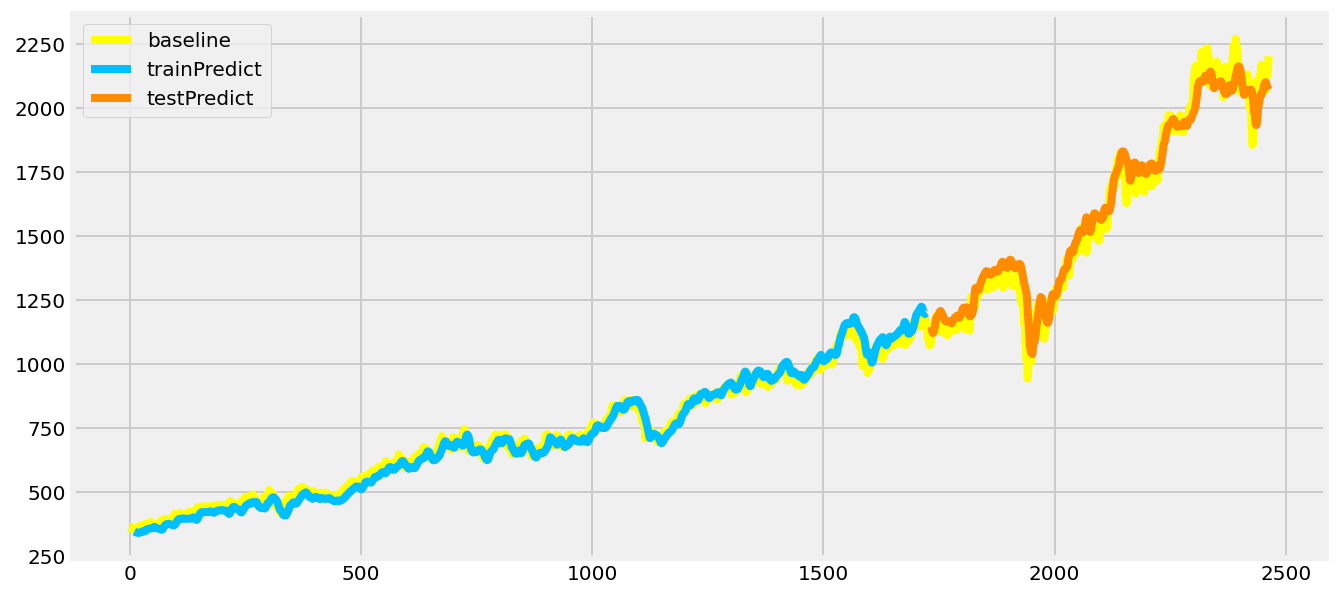

In [48]:
#plot predictions with respect to baseline
plot_predictions(scaled, scaler, trainPredict_inverse, testPredict_inverse, window_size=window_size)